<a href="https://colab.research.google.com/github/varunkr24/AIML/blob/Python/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/AIML/Projects/NN Project/NN Project/Autonomous_Vehicles_SVHN_single_grey1.h5"

In [ ]:
f = h5py.File(path, 'r')

In [ ]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [ ]:
f['X_test'].shape

(18000, 32, 32)

In [ ]:
f['X_train'].shape

(42000, 32, 32)

Label: 7


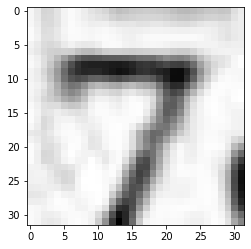

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(f['y_train'][8000]))
plt.imshow(f['X_train'][8000], cmap='gray')

In [ ]:
print(f['X_train'].shape)
print(f['y_train'].shape)
print(f['X_test'].shape)
print(f['y_test'].shape)
print(f['X_val'].shape)
print(f['y_val'].shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


In [ ]:
x_train = f['X_val'].value.reshape(f['X_val'].shape[0], 32, 32,1)
x_val = f['X_train'].value.reshape(f['X_train'].shape[0], 32, 32,1)
x_test = f['X_test'].value.reshape(f['X_test'].shape[0], 32, 32,1)

In [ ]:
y_train = f['y_val']
y_val = f['y_train']
y_test = f['y_test']

In [ ]:
x_train.shape

(60000, 32, 32, 1)

In [ ]:
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
print("x_train shape:", x_train.shape)
print("Images in x_train:", x_train.shape[0])
print("Images in x_test:", x_test.shape[0])
print("Max value in x_train:", x_test.max())
print("Min value in x_train:", x_test.min())
print("Max value in x_test:", x_test.max())
print("Min value in x_test:", x_test.min())

x_train shape: (60000, 32, 32, 1)
Images in x_train: 60000
Images in x_test: 18000
Max value in x_train: 0.9999
Min value in x_train: 0.0
Max value in x_test: 0.9999
Min value in x_test: 0.0


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [23]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2850 - accuracy: 0.1464 - val_loss: 2.1237 - val_accuracy: 0.3019
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0378 - accuracy: 0.3868 - val_loss: 1.7715 - val_accuracy: 0.5158
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6881 - accuracy: 0.5334 - val_loss: 1.4736 - val_accuracy: 0.5948
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4287 - accuracy: 0.6054 - val_loss: 1.2994 - val_accuracy: 0.6452
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2740 - accuracy: 0.6400 - val_loss: 1.2166 - val_accuracy: 0.6456
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1830 - accuracy: 0.6622 - val_loss: 1.1383 - val_accuracy: 0.6706
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1150 - accuracy: 0.6738 - val_loss: 1.0789 - val_ac

In [ ]:
def create_model(lr, Lambda):

    ## hyperparameters
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=lr, decay=1e-7, momentum=0.9)
    # Compile model
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer="sgd")
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=10)

In [21]:
# define the grid search parameters
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import regularizers, optimizers
lr = [1e-5,1e-4,1e-3,1e-2,1e-1]
Lambda = [1e-6,1e-5,1e-4,1e-3]

param_grid = dict(lr=lr,Lambda=Lambda)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Epoch 1/30
4000/4000 [==============================] - 10s 2ms/step - loss: 8.4000 - accuracy: 0.1519
Epoch 2/30
4000/4000 [==============================] - 7s 2ms/step - loss: 9.5534 - accuracy: 0.1536
Epoch 3/30
4000/4000 [==============================] - 7s 2ms/step - loss: 9.4874 - accuracy: 0.1504
Epoch 4/30
4000/4000 [==============================] - 7s 2ms/step - loss: 9.5482 - accuracy: 0.1483
Epoch 5/30
4000/4000 [==============================] - 7s 2ms/step - loss: 9.4858 - accuracy: 0.1524
Epoch 6/30
4000/4000 [==============================] - 7s 2ms/step - loss: 9.5787 - accuracy: 0.1566
Epoch 7/30
4000/4000 [==============================] - 7s 2ms/step - loss: 9.5952 - accuracy: 0.1545
Epoch 8/30
4000/4000 [==============================] - 7s 2ms/step - loss: 9.5666 - accuracy: 0.1507
Epoch 9/30
4000/4000 [==============================] - 7s 2ms/step - loss: 9.5956 - accuracy: 0.1542
Epoch 10/30
4000/4000 [==============================] - 7s 2ms/step - loss: 9.48

KeyboardInterrupt: ignored